In [85]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.patches import Ellipse
import sep

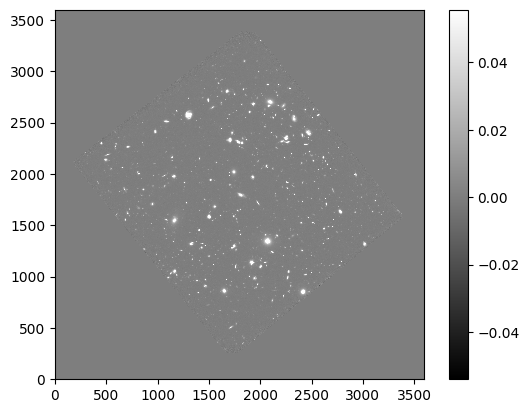

In [86]:
# read image into standard 2-d numpy array
url = 'sammy.fits'
hdu_list= fits.open(url)
data=hdu_list[0].data 

# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.savefig('image1.png')
plt.colorbar();

In [87]:
bkg = sep.Background(data)
print (bkg.globalback)
print(bkg.globalrms)

ValueError: Input array with dtype '>f4' has non-native byte order. Only native byte order arrays are supported. To change the byte order of the array 'data', do 'data = data.byteswap().newbyteorder()'

In [88]:
bkg_image = bkg. back()

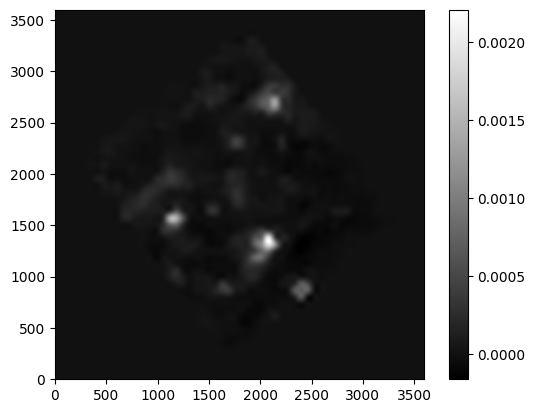

In [89]:
plt. imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('image2.png')
plt. colorbar();

In [90]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

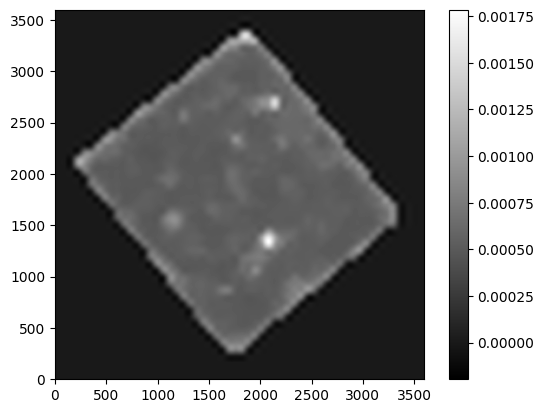

In [91]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('image3.png')
plt.colorbar();

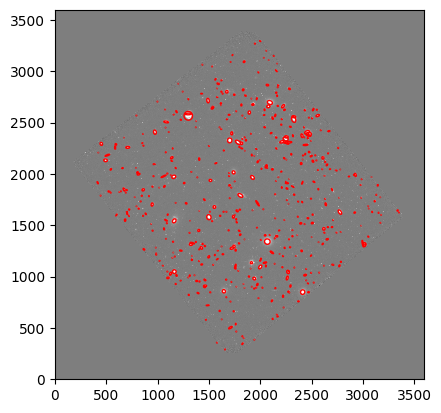

In [92]:
# Load the FITS file
hdulist = fits.open('sammy.fits')
data = hdulist[0].data

# Convert the byte order of the array to native
data = data.byteswap().newbyteorder()

# Measure the background and subtract it from the data
bkg = sep.Background(data)
data_sub = data - bkg

# Detect sources in the subtracted data
# Use a detection threshold of 1.5 times the global root mean square (rms) error
objects = sep.extract(data_sub, 50 , err=bkg.globalrms)

# Plot the original image with detected sources highlighted
fig, ax = plt.subplots()

# Normalize the image data for display
m, s = np.mean(data), np.std(data)
im = ax.imshow(data, interpolation='nearest', cmap='gray', vmin=m - s, vmax=m + s, origin='lower')

# Plot ellipses around the detected sources
for i in range(len(objects)):
    ellipse = Ellipse(
        xy=(objects['x'][i], objects['y'][i]),
        width=6 * objects['a'][i],
        height=6 * objects['b'][i],
        angle=objects['theta'][i] * 180. / np.pi
    )
    ellipse.set_facecolor('none')
    ellipse.set_edgecolor('red')
    ax.add_artist(ellipse)

# Show the plot
plt.show()

Number of sources detected: 484


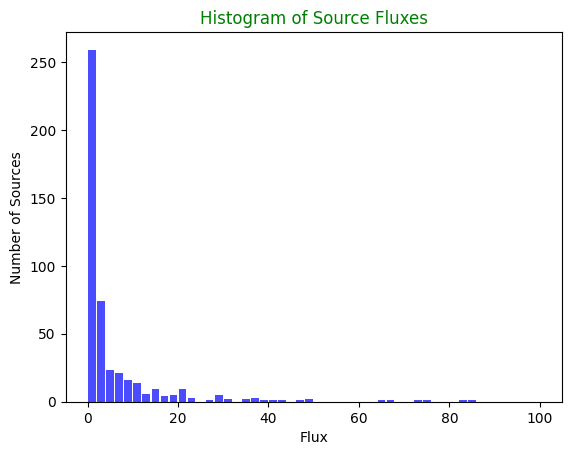

In [97]:
# Plot the original image with detected sources highlighted
#fig, ax = plt.subplots()

# Normalize the image data for display
#m, s = np.mean(data), np.std(data)
#im = ax.imshow(data, interpolation='nearest', cmap='gray', vmin=m - s, vmax=m + s, origin='lower')

# Plot ellipses around the detected sources with smaller sizes
for i in range(len(objects)):
    ellipse = Ellipse(
        xy=(objects['x'][i], objects['y'][i]),
        width=2 * objects['a'][i],
        height=2 * objects['b'][i],
        angle=objects['theta'][i] * 180. / np.pi
    )
    ellipse.set_facecolor('none')
    ellipse.set_edgecolor('red')
    ax.add_artist(ellipse)

# Set the axis limits for better visibility
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Show the plot
plt.show()

# Extract the fluxes of the detected sources
fluxes = objects['flux']

# Get the number of sources
num_sources = len(fluxes)
print(f"Number of sources detected: {num_sources}")

# Plot a histogram of the fluxes with adjusted bins and range
plt.figure()
plt.hist(fluxes, bins=50, range=(0, 100), color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel('Flux')
plt.ylabel('Number of Sources')
plt.title('Histogram of Source Fluxes',color="green")
plt.savefig('flux_histogram.png')
plt.show()


In [107]:

# Extract the fluxes of the detected sources
fluxes = objects['flux']

# Calculate mean, median, and standard deviation
mean_flux = np.mean(fluxes)
median_flux = np.median(fluxes)
std_dev_flux = np.std(fluxes)

print(f"Mean Flux: {mean_flux}")
print(f"Median Flux: {median_flux}")
print(f"Standard Deviation of Fluxes: {std_dev_flux}")

# Identify the largest outlier
largest_outlier_index = np.argmax(fluxes)
largest_outlier_flux = fluxes[largest_outlier_index]
num_std_away = (largest_outlier_flux - mean_flux) / std_dev_flux

print(f"\nLargest Outlier:")
print(f"Flux: {largest_outlier_flux}")
print(f"Index: {largest_outlier_index}")
print(f"Position: (x={objects['x'][largest_outlier_index]}, y={objects['y'][largest_outlier_index]})")
print(f"Number of Standard Deviations Away from Mean: {num_std_away}")


Mean Flux: 14.433702708214275
Median Flux: 1.722062587738037
Standard Deviation of Fluxes: 65.74523341335228

Largest Outlier:
Flux: 1182.0400390625
Index: 95
Position: (x=1914.2192977970597, y=1134.4065330758008)
Number of Standard Deviations Away from Mean: 17.75955876547478


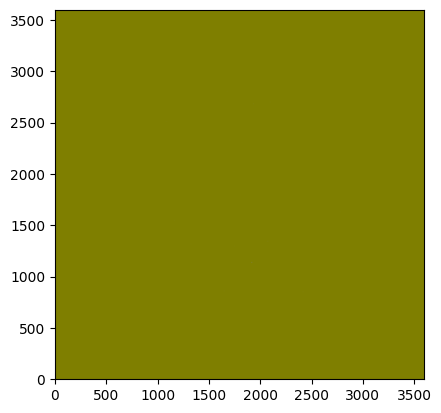

In [121]:

# can't do this I tried for one of the image yet can't do it) 
url = 'sammy125.fits' 
hdu_list = fits.open(url)
data = hdu_list[0].data

normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))

rgb_image = np.zeros((data.shape[0], data.shape[1], 3))

rgb_image[:, :, 0] = 0.5

rgb_image[:, :, 1] = 0.5

rgb_image[:, :, 2] = normalized_data

plt.imshow(rgb_image, origin='lower')
plt.savefig('udf_balanced_false_color_image.png')
plt.show()